# Titanic
## Apartado 1
El 15 de abril de 1912, el mayor transatlántico de pasajeros chocó con un iceberg durante su viaje inaugural. Cuando el Titanic se hundió, mató a 1502 de 2224 pasajeros y tripulantes. Esta tragedia sensacional conmocionó a la comunidad internacional y condujo a mejores regulaciones de seguridad para los buques. Una de las razones por las que el naufragio resultó en tal pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros.
El dataset titanic contiene datos de 887 de los pasajeros reales del Titanic. Las columnas describen diferentes atributos de la persona, incluso si sobrevivieron, su edad, su clase de pasajeros, su sexo y la tarifa que pagaron.

Queremos saber cual es la relación de los atributos de los pasajeron que tienen más probabilidad de sobrevivir.

## Apartado 2
Integración y selección de datos a analizar.
Importamos los paquetes que vamos a necesitar.

In [293]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

In [294]:
# Visualization style
%matplotlib inline
sns.set()

Importamos ahora el set de datos train y test para su exploración y análisis.

In [295]:
# Import test and train datasets
dftrain = pd.read_csv('/Users/carinazavala/Documents/UOC/1er Semestre/Tipología y ciclo de vida de los datos/PEC3/csv/train.csv')
dftest = pd.read_csv('/Users/carinazavala/Documents/UOC/1er Semestre/Tipología y ciclo de vida de los datos/PEC3/csv/test.csv')

# View first lines of training data
dftrain.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## Apartado 3
Analizamos los atributos del dataset. La variable de edad no contiene todos los valores por lo que necesita un tratamiento de datos. Para este caso haremos una imputación de datos nulos. 

In [296]:
dftrain = dftrain.replace('',np.NaN)
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [297]:
# Summary de datos train 
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [298]:
# Hacemos lo mismo con los datos test
dftest = dftest.replace('',np.NaN)
dftest
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Para encontrar los posibles outliers haremos una gráfica boxplot.
Utilizaremos la variable Age ya que es la variable donde pudieran existir los outliers.

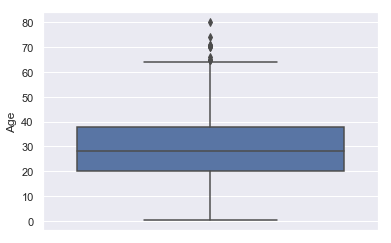

In [299]:
# Convertimos la variable Age a entero
sns.boxplot(y = "Age", data=dftrain)


Se observa que existen outliers pero son parte del análisis ya que una persona en promedio vive 80 años por lo que no afecta a nuestro modelo porque pertenece a él.

## Apartado 4 y 5

Comenzaremos con el análisis de los datos. Hacemos una comparación de las distribuciones del data set train y test para conocer que tanto difieren uno del otro

In [300]:
# Compare distribution of features in train and test data with describe 
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [301]:
dftest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


La desviación estándar son similares comparando Pclass y Age en los datos train y test, pero para Parch y Fare son ligeramente mayores en test, mientras que, SibSp es mayor en train.

Visualización gráfica de pasajeros que sobrevivieron o murieron en train.

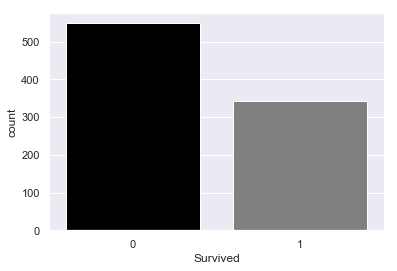

In [302]:
# Review how many passengers survived and died in train data
sns.countplot(x='Survived', data=dftrain,
             palette=sns.color_palette(['black','grey']));

In [303]:
# Obtain the survived percentage in train data
print(dftrain.Survived.sum()/dftrain.Survived.count())

# the result shows that 38 % survived 

0.3838383838383838


38% de los pasajeros sobrevivieron
->modelo1:sin sobrevivientes
submission:0.627 accuracy

In [304]:
dftest['Survived'] = 0
dftest[['PassengerId', 'Survived']].to_csv('no_survivors.csv', index=False)

Variable = Sex, Sobrevivieron más mujeres que hombres 

In [305]:
# Analizing survivors per sex in train data 
dftrain.groupby(['Survived','Sex'])['Survived'].count()
# more female passengers survived

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

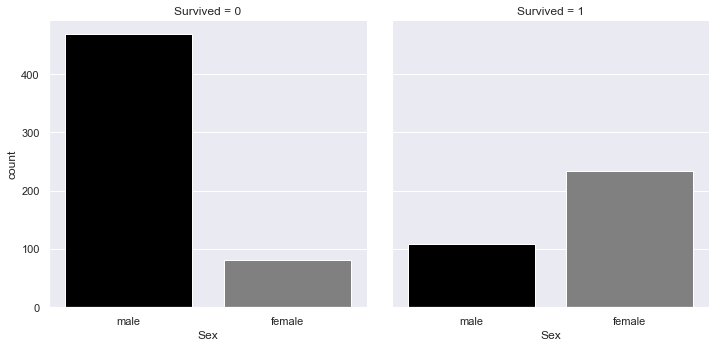

In [306]:
# Plotting this in bar chart
sns.catplot(x='Sex', col='Survived', kind='count', data=dftrain,
           palette=sns.color_palette(['black','grey']))

In [307]:
# Obtain the survived percentage per sex train data
print("% of women survived: " , dftrain[dftrain.Sex == 'female'].Survived.sum()/dftrain[dftrain.Sex == 'female'].Survived.count())
print("% of men survived:   " , dftrain[dftrain.Sex == 'male'].Survived.sum()/dftrain[dftrain.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


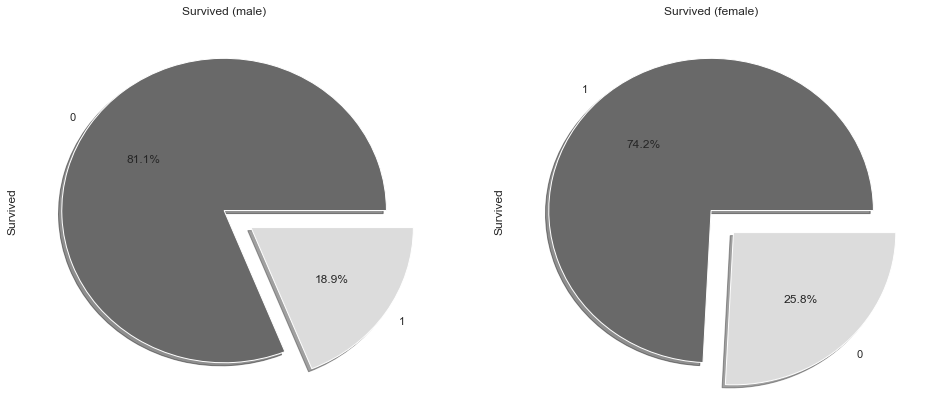

In [308]:
# Visualization of percentage per sex survivors in pie plott
colors=['dimgrey','gainsboro']
f,ax=plt.subplots(1,2,figsize=(16,7))
dftrain['Survived'][dftrain['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=colors)
dftrain['Survived'][dftrain['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,colors=colors)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

En los datos de entrenamiento el 74% de las mujeres sobrevivieron

->modelo2: todas las mujeres sobrevivieron y todos los hombres murieron 
submission:0.766 accueracy


In [309]:
dftest['Survived'] = dftest.Sex == 'female'
dftest['Survived'] = dftest.Survived.apply(lambda x: int(x))
dftest[['PassengerId', 'Survived']].to_csv('women_survive.csv', index=False)

Passgenger Class, la tasa de supervivencia decrece con Pclass

In [310]:
pd.crosstab(dftrain.Pclass, dftrain.Survived, margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [311]:
print("% of survivals in") 
print("Pclass=1 : ", dftrain.Survived[dftrain.Pclass == 1].sum()/dftrain[dftrain.Pclass == 1].Survived.count())
print("Pclass=2 : ", dftrain.Survived[dftrain.Pclass == 2].sum()/dftrain[dftrain.Pclass == 2].Survived.count())
print("Pclass=3 : ", dftrain.Survived[dftrain.Pclass == 3].sum()/dftrain[dftrain.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


Hubieron más sobrevivientes con Pclass=1 el 62.9%, visualización gráfica de este comportamiento.

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


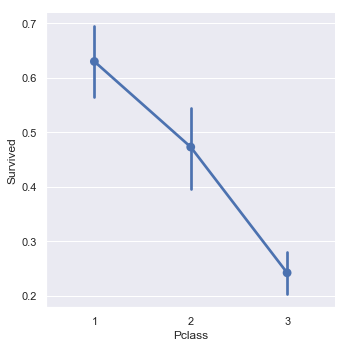

In [312]:
sns.catplot('Pclass','Survived', kind='point', data=dftrain);

Class and Sex, casi todas las mujeres en Pclass 1 y 2 sobrevivieron y casi todos los hombres en Pclass 2 y 3 murieron

In [313]:
pd.crosstab([dftrain.Sex, dftrain.Survived], dftrain.Pclass, margins=True).style.background_gradient(cmap='PuBu')

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


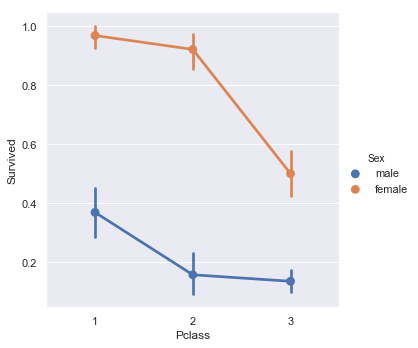

In [314]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=dftrain);

Embarked : Tasa de supervivencia menor para S y mayor para C

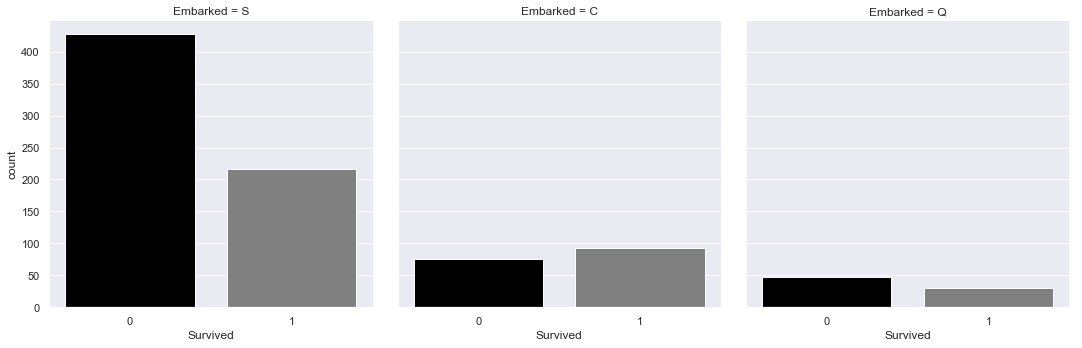

In [315]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=dftrain,
           palette=sns.color_palette(['black','grey']));

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


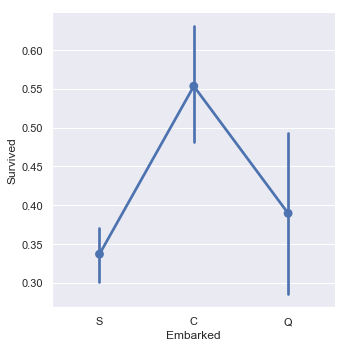

In [316]:
sns.catplot('Embarked','Survived', kind='point', data=dftrain)
plt.show()

Embarked and Sex

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


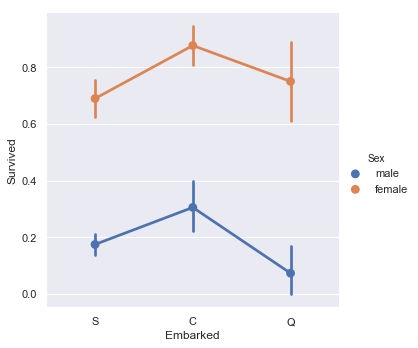

In [317]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=dftrain)
plt.show()

Embarked, Pclass y Sex :

Practicamente todas las mujeres de Pclass 2 que embarcaron en C y Q sobrevivieron, también casi todas las mujeres de Pclass 1.

Todos los hombres de Pclass 1 y 2 embarcados en Q murieron, la tasa de supervivencia de los hombres en Pclass 2 y 3 fue menor a 0.2

Los hombres restantes en Pclass 1 embarcados en S y Q, tuvieron una tasa de supervivencia cercana a 0.4

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


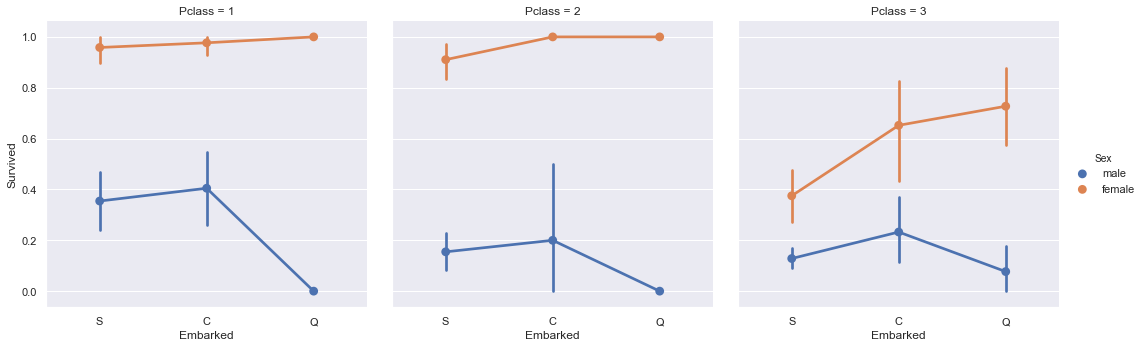

In [318]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=dftrain)
plt.show()

In [319]:
pd.crosstab([dftrain.Survived], [dftrain.Sex, dftrain.Pclass, dftrain.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

modelo3 : basado en PClass, Sex y Embarked , submission : 0.779 accuracy

In [320]:
# model 3
dftest['Survived'] = 0
# all women survived
dftest.loc[ (dftest.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
dftest.loc[ (dftest.Sex == 'female') & (dftest.Pclass == 3) & (dftest.Embarked == 'S') , 'Survived'] = 0
dftest[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

In [321]:
for df in [dftrain, dftest]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i


In [322]:
print(dftrain[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


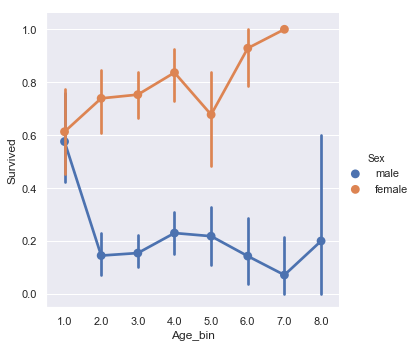

In [323]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data=dftrain)
plt.show()

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


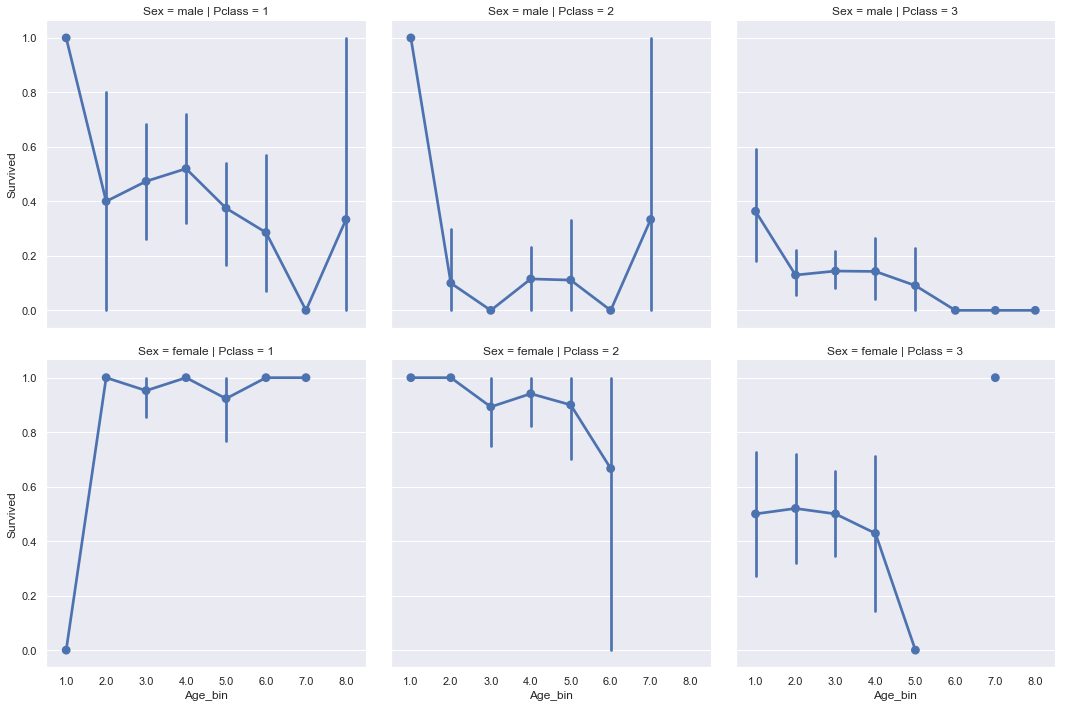

In [324]:
sns.catplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [325]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.Age_bin, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

Para pasajeros en 

*Age_bim=1(menores a 10): todos los hombres en Pclass=1 y 2 sobrevivieron.

*Mujeres en Pclass=3 y Age_bin= 5 murieron 

*Menos del 50% de mujeres en Pclass=3 y Age_bin=4 sobrevivieron

*Más del 50% de hombres en Pclass=1 y Age_bin=4 sobrevivieron

In [326]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
dftest.loc[ (dftest.Sex == 'male') & (dftest.Pclass == 1) & (dftest.Age_bin == 1), 'Survived'] = 1
dftest.loc[ (dftest.Sex == 'male') & (dftest.Pclass == 2) & (dftest.Age_bin == 1), 'Survived'] = 1

SibSp y Parch

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


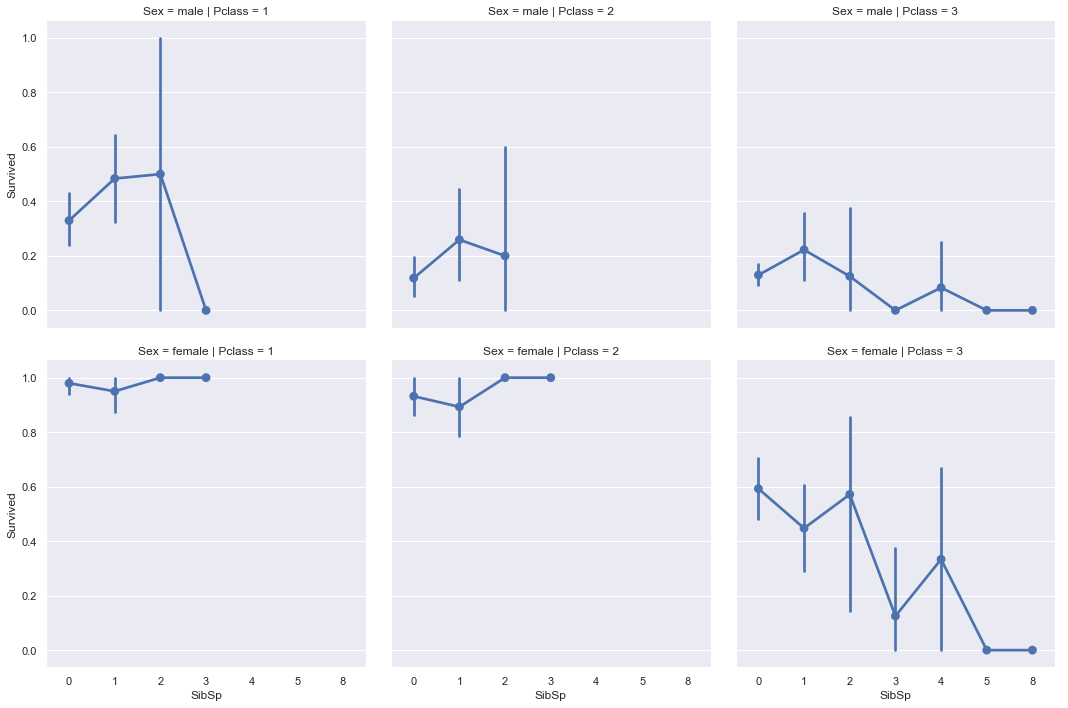

In [327]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [328]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.SibSp, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

*Para hombres, no hubo porcentaje de sobrevivencia para ningún valor arriba de 0.5 en SibSp.

*Para mujeres, pasajeras con SibSp=3 y Pclass=3 murieron con SibSp>4

*Para mujeres, pasajeras con SibSp=1 y Pclass=3 el porcentaje de sobrevivencia está por denajo de 50%

In [329]:
# all females with SibSp > 7 died
dftest.loc[ (dftest.Sex == 'female') & (dftest.SibSp > 7) , 'Survived'] = 0

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


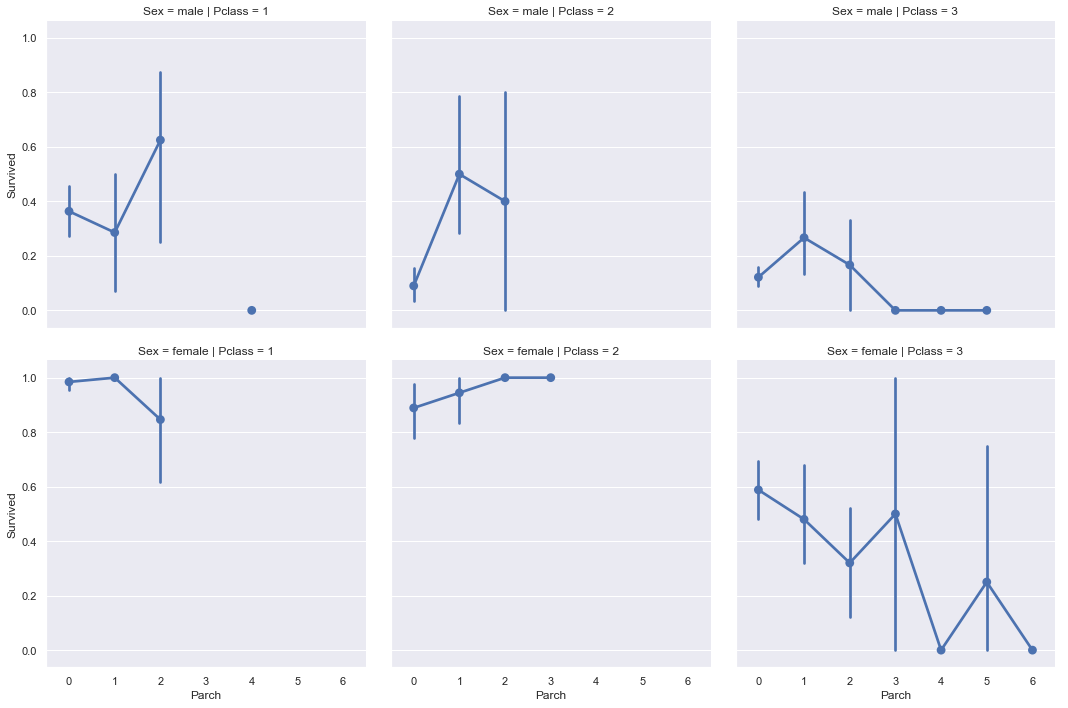

In [330]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [331]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.Parch, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

*Mujeres con Parch = 2 y Pclass = 3 la tasa de supervivencia está. por debajo de 0.5.

*Todas las mujeres con Parch = 4 y Pclass = 3 murieron.

*Todas las mujeres con Parch > 4 murieron. 

*Las mujeres con Parch = 1 y Pclass = 3  tasa de supervivencia está por debajo de  0.5

*Para hombres todas las tasas de supervivencia es menor a 0.5 para cualquier valor de Parch, excepto para Parch = 2 y Pclass = 1.

In [332]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
dftest.loc[ (dftest.Sex == 'female') & (dftest.Pclass == 3) & (dftest.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
dftest.loc[ (dftest.Sex == 'female') & (dftest.Pclass == 3) & (dftest.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
dftest.loc[ (dftest.Sex == 'female') & (dftest.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
dftest.loc[ (dftest.Sex == 'male') & (dftest.Pclass == 1) & (dftest.Parch == 1) , 'Survived'] = 1

dftest.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


Fare : numérica continua a 12 contenedores

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


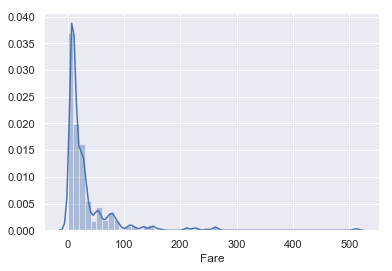

In [333]:
sns.distplot(dftrain['Fare'])
plt.show()

In [334]:
for df in [dftrain, dftest]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


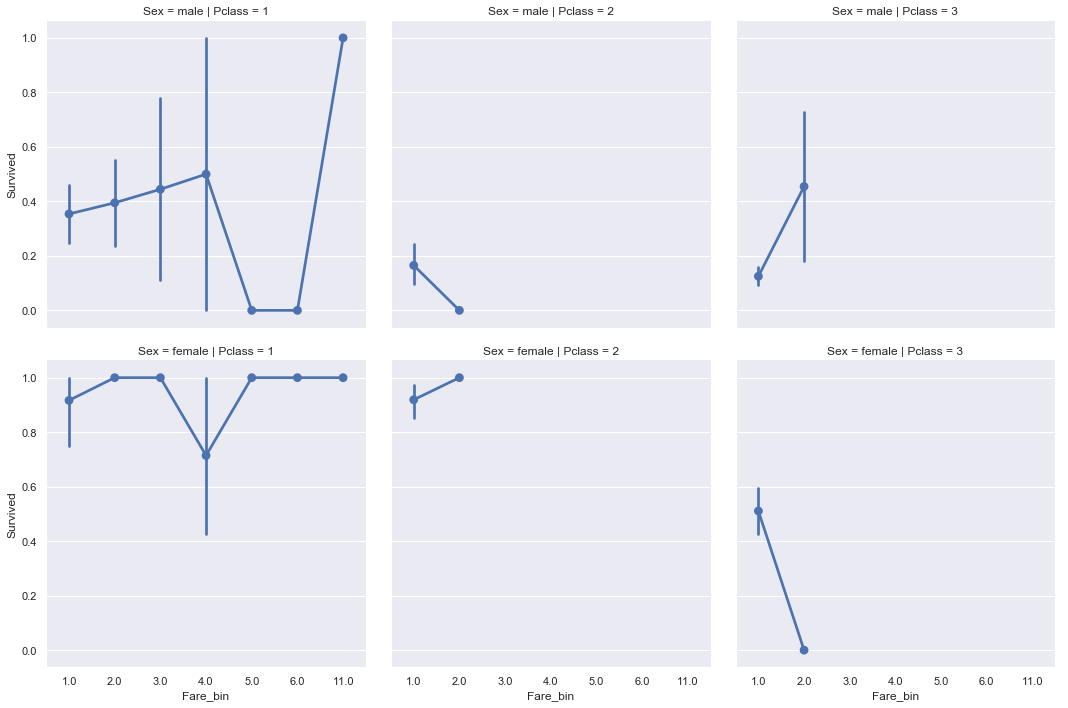

In [335]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [336]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.Fare_bin, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

In [337]:
# males in Fare_bin = 11 survived
dftest.loc[ (dftest.Sex == 'male') & (dftest.Fare_bin == 11), 'Survived'] = 1

modelo4: modelo3 + Age_bin, SibSp,Parch and Fare_bin
submission:0.789 accuracy

In [338]:
# modelo4
dftest[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)


In [339]:
dftest.drop(['Survived'],axis=1,inplace=True)

# Data wrangling

Construir dos nuevos dataframes dftrain_ml y dftest_ml, los cuales sólo contendrán ordinales y no nulos para ser usados en algoritmos de machine learning

1.Copiar los datos para los nuevos dataframes
2.Convertir de categóricas a numéricas las variables con pd.get_dummies
3.Dejar de lado las variables que no sean útiles en la predicción
4.Usar Standard scaler y aplicar la división train/test

In [340]:
#1
dftrain_ml = dftrain.copy()
dftest_ml = dftest.copy()

In [341]:
#2
dftrain_ml = pd.get_dummies(dftrain_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
dftrain_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
dftrain_ml.dropna(inplace=True)

In [342]:
#3
passenger_id = dftest_ml['PassengerId']
dftest_ml = pd.get_dummies(dftest_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
dftest_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

Visualizamos los datos con .head y .info

In [343]:
dftrain_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [344]:
dftrain_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [345]:
dftest_ml.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
5,14.0,0,0,9.2250,1,0,1,0,1
6,30.0,0,0,7.6292,0,1,0,0,1
7,26.0,1,1,29.0000,1,0,1,1,0
8,18.0,0,0,7.2292,0,0,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,1


In [346]:
dftest_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


Matriz de correlación

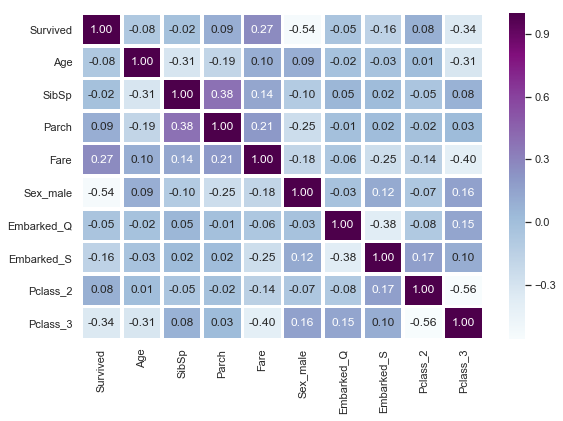

In [347]:
corr = dftrain_ml.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, cmap='BuPu', annot = True, linewidths=2.5 , fmt = '.2f',ax=ax)
plt.show()

Correlaciones

Survived vs Fare están correlacionadas positivamente
Survived vs Sex_male están correlacionadas negativamente
Survived vs Pclass_3 están correlacionadas negativamente
SibSp vs Parch están correlacionadas positivamente

# Preprocesamiento de datos con Standard Scaler

Es necesario estandarizar transformar los datos para calcular la media y desviación estándar en un conjunto de entrenamiento (dftrain_ml) para que luego se vuelva a aplicar la misma transformación en el conjunto de prueba (dftest_ml).

In [348]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Transformación de dftrain_ml

In [349]:
# for dftrain_ml
scaler.fit(dftrain_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(dftrain_ml.drop('Survived',axis=1))
dftrain_ml_sc = pd.DataFrame(scaled_features, columns=dftrain_ml.columns[:-1])
dftrain_ml_sc.head(4)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2
0,-0.530377,0.524570,-0.505895,-0.518978,0.759051,-0.202031,0.537409,-0.565489,1.005618
1,0.571831,0.524570,-0.505895,0.691897,-1.317434,-0.202031,-1.860779,-0.565489,-0.994413
2,-0.254825,-0.551703,-0.505895,-0.506214,-1.317434,-0.202031,0.537409,-0.565489,1.005618
3,0.365167,0.524570,-0.505895,0.348049,-1.317434,-0.202031,0.537409,-0.565489,-0.994413


Transformación de dftest_ml

In [350]:
# for dftest_ml
dftest_ml.fillna(dftest_ml.mean(), inplace=True)
# scaler.fit(dftest_ml)
scaled_features = scaler.transform(dftest_ml)
dftest_ml_sc = pd.DataFrame(scaled_features, columns=dftest_ml.columns)
dftest_ml_sc.head(4)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.330723,-0.551703,-0.505895,-0.508025,0.759051,4.949747,-1.860779,-0.565489,1.005618
1,1.191823,0.524570,-0.505895,-0.523705,-1.317434,-0.202031,0.537409,-0.565489,1.005618
2,2.225142,-0.551703,-0.505895,-0.472885,0.759051,4.949747,-1.860779,1.768380,-0.994413
3,-0.185937,-0.551703,-0.505895,-0.492267,0.759051,-0.202031,0.537409,-0.565489,1.005618


Dividir train/test
utilizaremos el 70% de los datos para el entrenamiento y el 30% para pruebas

In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dftrain_ml.drop('Survived',axis=1), dftrain_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(dftrain_ml_sc, dftrain_ml['Survived'], test_size=0.30, random_state=101)

In [352]:
# all data 
# unscaled
X_train_all = dftrain_ml.drop('Survived',axis=1)
y_train_all = dftrain_ml['Survived']
X_test_all = dftest_ml

# scaled
X_train_all_sc = dftrain_ml_sc
y_train_all_sc = dftrain_ml['Survived']
X_test_all_sc = dftest_ml_sc

In [353]:
# fillna: fill nan with mean values for that column
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


# Algoritmos de machine learning y comparación del resultado de los modelos

Para la comparación de los resultados se usan las siguientes métricas confusion matrix, accuracy score and classification report.
    
    1.- Confusion matrix: Se utiliza para evaluar la calidad de la salida de un clasificador. For a binary classifier this matrix consist in 
    TN: Verdaderos negativos (predicción: no sobrevivió, verdad: no sobrevivió)
    FP: Falsos positivos (predicción: sobrevivió, true: no sobrevivió)
    FN: Falsos negativos (predicción: no sobrevivió, true: sobrevivió)
    TP: Verdaderos positivos (predicción: sobrevivió, true: sobrevivió)
    
    2.- Accuracy score: es un valor numérico resultado de la confusion matrix
    accuracy_score=correct predictions/total predictions
                  =(TP + TN) / (TP + TN + FP + FN)
                  
    3.- Classification report: La precisión es la relación tp / (tp + fp) donde tp es el número de verdaderos positivos y fp el número de falsos positivos. La precisión es intuitivamente la capacidad del clasificador para no etiquetar como positiva una muestra que es negativa.
    El retiro es la relación tp / (tp + fn) donde tp es el número de verdaderos positivos y fn el número de falsos negativos. La recuperación es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas.
    La puntuación F-beta se puede interpretar como una media armónica ponderada de la precisión y el recuerdo, donde una puntuación F-beta alcanza su mejor valor en 1 y la peor puntuación en 0.
    Los pesos de puntuación F-beta recuerdan más que la precisión por un factor de beta. beta == 1.0 significa recuperación y precisión son igualmente importantes.

In [354]:
from sklearn.metrics import accuracy_score, 
classification_report, confusion_matrix

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-354-acc2a11b7d59>, line 1)

* Logistic Regression 

In [ ]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Make an instance of the model
logreg = LogisticRegression()

# Fit the model with train and test data 
logreg.fit(X_train,y_train)

# Make prediction for new observations
pred_logreg = logreg.predict(X_test)

In [ ]:
# Analyze result
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

In [ ]:
# Train again for all data 
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

# Submit into new dataframe
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = dftest['PassengerId']
sub_logreg['Survived'] = pred_all_logreg
#sub_logmodel.to_csv('logmodel.csv',index=False)


* Gaussian Naive Bayes

In [ ]:
# Import neighbors classifier
from sklearn.naive_bayes import GaussianNB

# Make an instance of the key neighbors classifier class
gnb=GaussianNB()

# Fit the model with train and test data
gnb.fit(X_train,y_train)

# Make prediction for new observations
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

* KNN - KNeighborsClassifier

In [ ]:
# Import neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Make an instance of the key neighbors classifier class
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the model with train and test data
knn.fit(X_train_sc,y_train_sc)

# Make prediction for new observations
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

In [ ]:
# Analyze result
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

In [ ]:
# Train again for all data 
sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = dftest['PassengerId']
sub_knn['Survived'] = pred_all_knn
#sub_knn.to_csv('knn.csv',index=False)

* Decision Tree Classifier

In [ ]:
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Make an instance of the decision tree classifier class
dtree = DecisionTreeClassifier()

# Fit the model with train and test data
dtree.fit(X_train,y_train)

# Make prediction for new observations
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

Another decision tree with different parameters for max_features, max_depth and min_sample_split

In [ ]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

In [ ]:
# Train again for all data
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

* Random Forest Classifier

In [ ]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Make an instance of the Random Forest classifier class
rfc = RandomForestClassifier(max_depth=6, max_features=7)

# Fit the model with train and test data
rfc.fit(X_train, y_train)

# Make prediction for new observations
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

In [ ]:
# Train again for all data
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)


sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = dftest['PassengerId']
sub_rfc['Survived'] = pred_all_rfc
#sub_rfc.to_csv('randforest.csv',index=False)                

* SVM Classifier

In [ ]:
# Import
from sklearn.svm import SVC

# Make an instance  for SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)

# Fit the model with train and test data
svc.fit(X_train_sc, y_train_sc)

# Make prediction for new observations
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(y_test_sc, pred_svc))
print(classification_report(y_test_sc, pred_svc))
print(accuracy_score(y_test_sc, pred_svc))

In [ ]:
# Train again for all data
svc.fit(X_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(X_test_all_sc)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = dftest['PassengerId']
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc.csv',index=False)

* k fold cross_validation

Este algoritmo divide los datos en conjuntos k y luego hace k ajustes
utilizando cada conjunto k-1 veces como entrenamiento y una vez como 
datos de prueba


In [ ]:
# Import 
from sklearn.model_selection import cross_val_score

para SVM Classififer

In [ ]:
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

para Random Forest Classifier

In [ ]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

In [ ]:
para DecisionTreeClassifier

In [ ]:
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

In [ ]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

In [ ]:
Los mejores resultados los obtenemos de Decision Tree, Random Forest y SVC Classifiers

## Apartado 6
Por medio del análisis de datos encontramos realción entre las variables Sex, Age, Embarqued. Con estas variables se trabajó para hacer el modelo predictivo. 
Apartir de los resultados obtenidos podemos decir que la probabilidad de supervivencia de los pasajeros del titanic depende de las variables Sex, Age y Embarqued.